In [1]:
import PyDSTool
from PyDSTool.Toolbox import phaseplane as pp
import matplotlib
from pylab import *
import copy
import math
matplotlib.rcParams.update({'font.size': 30})


from parameters_emt_B import *



In [2]:
def reduce_fp(fixed_points):

        final = []
        for el in fixed_points:
                if len(final)>0:
                        addI=True
                        for item in final:
                                if np.abs(el['u']-item['u'])<0.001:
                                        if np.abs(el['mz']-item['mz'])<0.001:
                                                addI=False
                        if addI:
                                final+=[el]

                else:
                        final+=[el]

        return tuple(final)




In [3]:
DSargs = PyDSTool.args(name='emt',checklevel=2)
DSargs.fnspecs = {'H':(['X','X0','nX','lamdaX'],'lamdaX+(1.-lamdaX)/(1.+(X/X0)**nX)'),
                  'Z':(['mzX','uX','u0X','nuX','kzX','gzX'],'gzX*mzX*L(uX,u0X,nuX)/kzX'),
                  'M' : (['i','n','x','x0'],'(x/x0)**i/(1+(x/x0))**n'),
                  'indL': (['i'],'if(i==0,li0,if(i==1,li1,if(i==2,li2,if(i==3,li3,if(i==4,li4,if(i==5,li5,li6))))))'),
                  'indYm': (['i'],'if(i==0,ymi0,if(i==1,ymi1,if(i==2,ymi2,if(i==3,ymi3,if(i==4,ymi4,if(i==5,ymi5,ymi6))))))'),
                  'indYu': (['i'],'if(i==0,yui0,if(i==1,yui1,if(i==2,yui2,if(i==3,yui3,if(i==4,yui4,if(i==5,yui5,yui6))))))'),
                  'combination':(['k','n'],'special_gamma(n+1)/special_gamma(k+1)/special_gamma(n-k+1)'),
                  'combinationU':(['k','n'],'k*special_gamma(n+1)/special_gamma(k+1)/special_gamma(n-k+1)'),
                  'L' : (['X','X0','nX'],'sum(i,0,6,li[i]*combination([i],nX)*M([i],nX,X,X0))'),
                  'Ym' : (['X','X0','nX'],'sum(i,0,6,ymi[i]*combination([i],nX)*M([i],nX,X,X0))'),
                  'Yu' : (['X','X0','nX'],'sum(i,0,6,yui[i]*combinationU([i],nX)*M([i],nX,X,X0))'),
                  'L3' : (['X','X0','nX'],'sum(i,0,2,li[i]*combination([i],nX)*M([i],nX,X,X0))'),
                  'Ym3' : (['X','X0','nX'],'sum(i,0,2,ymi[i]*combination([i],nX)*M([i],nX,X,X0))'),
                  'Yu3' : (['X','X0','nX'],'sum(i,0,2,yui[i]*combinationU([i],nX)*M([i],nX,X,X0))')}

DSargs.pars = { 'gz':gz, 'u0':u0,'nu':nu,'kz':kz,
                'li0':li0, 'li1':li1, 'li2':li2, 'li3':li3, 'li4':li4, 'li5':li5, 'li6':li6,
                'ymi0':ymi0, 'ymi1':ymi1, 'ymi2':ymi2, 'ymi3':ymi3, 'ymi4':ymi4, 'ymi5':ymi5, 'ymi6':ymi6,
                'yui0':yui0, 'yui1':yui1, 'yui2':yui2, 'yui3':yui3, 'yui4':yui4, 'yui5':yui5, 'yui6':yui6,
                'gu':gu, 'Z0u':Z0u,'nzu':nzu, 'lamdazu':lamdazu,'S0u':S0u,'nsu':nsu,'lamdaSu':lamdaSu,'u0':u0,'nu':nu,'ku':ku,
                'gmz':gmz, 'Z0m':Z0m,'nzm':nzm, 'lamdaZm':lamdaZm,'S0m':S0m,'nsm':nsm,'lamdaSm':lamdaSm,'u0':u0,'nu':nu,'kmz':kmz,
                'gms':gms, 'I0m':I0m, 'nIm':nIm, 'lamdaIm':lamdaIm, 'S0ms':S0ms, 'nsms':nsms, 'lamdaSms':lamdaSms, 'u30':u30,
                'nu3':nu3, 'kms':kms, 'gu3':gu3, 'Z0u3':Z0u3, 'nzu3':nzu3, 'lamdazu3':lamdazu3, 'S0u3':S0u3, 'nsu3':nsu3,
                'lamdaSu3':lamdaSu3, 'ku3':ku3, 'gs':gs, 'ks':ks}

DSargs.varspecs = { 'u':'gu*H(Z(mz,u,u0,nu,kz,gz),Z0u,nzu,lamdazu)*H(S,S0u,nsu,lamdaSu)-mz*Yu(u,u0,nu)-ku*u',
                   'mz':'gmz*H(Z(mz,u,u0,nu,kz,gz),Z0m,nzm,lamdaZm)*H(S,S0m,nsm,lamdaSm)-mz*Ym(u,u0,nu)-kmz*mz',
                   'ms':'gms*H(I,I0m,nIm,lamdaIm)*H(S,S0ms,nsms,lamdaSms)-ms*Ym3(u3,u30,nu3)-kms*ms',
                   'u3':'gu3*H(Z(mz,u,u0,nu,kz,gz),Z0u3,nzu3,lamdazu3)*H(S,S0u3,nsu3,lamdaSu3)-ms*Yu3(u3,u30,nu3)-ku3*u3',
                    'S':'gs*ms*L3(u3,u30,nu3)-ks*S'

                }


In [4]:
def plotContPartial2(DSarg,fixed_points,x,y,title,maxnum,step,col='k'):
        DSargs = copy.deepcopy(DSarg)
        freepar='I'
        DSargs.pdomain={'I':[0,100000]}
        odex = PyDSTool.Generator.Vode_ODEsystem(DSargs)
        odex.set(ics=fixed_points[0])
        PCargs = PyDSTool.args(name='EMTest',type='EP-C')
        PCargs.freepars =['I']
        PCargs.MaxNumPoints = maxnum ## max number for each call of forward and backward
        PCargs.MaxStepSize = 1e+2
        PCargs.MinStepSize = 1e-2
        PCargs.StepSize = step
        PCargs.StopAtPoints = ['B'] ##  stops searching once this point is hit
        PCargs.LocBifPoints = 'all' ##
        PCargs.SaveEigen = True

        PyCont = PyDSTool.ContClass(odex) # Set up continuation class
        PyCont.newCurve(PCargs)
        PyCont['EMTest'].forward()
        PyCont['EMTest'].backward()
        PyCont.display([x,y],stability=True,color=col)
        PyCont.plot.toggleLabels("off")
        plt.title('')
        plt.xlabel(x+" (molecules)",fontsize=20)
        plt.ylabel(y+" (molecules)",fontsize=20)
        #plt.savefig(title+".png",bbox_inches='tight')
        #plt.show()
        #plt.close()



In [5]:
DSargs.ics = {'u':1000,'mz':1000,'S':200000,'ms':2000,'u3':4000}
DSargs.xdomain = {'u':[0,100000],'mz':[0,100000],'S':[0,400000],'ms':[0,100000],'u3':[0,100000]}
DSargs.tdomain = [0,5000]
DSargs.algparams = {'init_step':0.1}
DSargs.pars['I']=50000



LP Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

LP Point found 
LP Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

LP Point found 
B Point found 


/home/madeline/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


LP Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

LP Point found 
LP Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

LP Point found 
B Point found 
LP Point found 
LP Point found 
LP Point found 
LP Point found 
B Point found 
LP Point found 
LP Point found 
LP Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

LP Point found 
B Point found 
LP Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

LP Point found 
LP Point found 
Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMetho

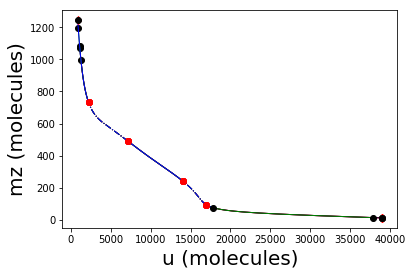

In [6]:
DSargs.pars['lamdaIm']=10.
el=[40000,48000,50000,56000,62000]
col=['r','m','k','g','b']
for i in range(len(el)):
                DSargs.pars['I']=el[i]
                ode = PyDSTool.Generator.Vode_ODEsystem(DSargs)
                Ffixed_points = pp.find_fixedpoints(ode,n=5,maxsearch=1e+4,eps=1e-10)
                fixed_points = reduce_fp(Ffixed_points)
                plotContPartial2(DSargs,fixed_points,'u','mz','EMT_redCont_lamdaIm',2000,1e+0,col[i])
